In [2]:
import math
import pandas_datareader as web
import tushare as ts
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
pro = ts.pro_api()
# 万科A
df = pro.daily(ts_code='000002.SZ', start_date='201000101', end_date='20210128')
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000002.SZ,20210128,29.05,29.07,28.22,28.43,29.40,-0.97,-3.2993,786041.39,2240534.518
1,000002.SZ,20210127,29.69,29.95,29.37,29.40,29.70,-0.30,-1.0101,724302.75,2146772.480
2,000002.SZ,20210126,29.26,30.15,29.15,29.70,29.36,0.34,1.1580,816654.58,2433266.442
3,000002.SZ,20210125,29.26,29.60,28.56,29.36,29.26,0.10,0.3418,973749.72,2825867.846
4,000002.SZ,20210122,29.95,29.95,29.01,29.26,30.10,-0.84,-2.7907,1058090.55,3114137.415


In [5]:
df.shape

(2538, 11)

In [11]:
df = df.sort_values(by=['trade_date'], ascending=True)
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
2537,000002.SZ,20100104,10.85,10.87,10.60,10.60,10.81,-0.21,-1.9400,969832.53,1.034345e+06
2536,000002.SZ,20100105,10.51,10.52,10.20,10.36,10.60,-0.24,-2.2600,1848620.78,1.910014e+06
2535,000002.SZ,20100106,10.35,10.51,10.20,10.36,10.36,0.00,0.0000,1358604.06,1.405757e+06
2534,000002.SZ,20100107,10.36,10.43,10.24,10.28,10.36,-0.08,-0.7700,1152441.98,1.188788e+06
2533,000002.SZ,20100108,10.28,10.38,10.19,10.35,10.28,0.07,0.6800,1085304.22,1.117118e+06
...,...,...,...,...,...,...,...,...,...,...,...
4,000002.SZ,20210122,29.95,29.95,29.01,29.26,30.10,-0.84,-2.7907,1058090.55,3.114137e+06
3,000002.SZ,20210125,29.26,29.60,28.56,29.36,29.26,0.10,0.3418,973749.72,2.825868e+06
2,000002.SZ,20210126,29.26,30.15,29.15,29.70,29.36,0.34,1.1580,816654.58,2.433266e+06
1,000002.SZ,20210127,29.69,29.95,29.37,29.40,29.70,-0.30,-1.0101,724302.75,2.146772e+06


In [12]:
df['trade_date'] = pd.to_datetime(df.trade_date, format='%Y%m%d')
df.index = df['trade_date']
df = df.sort_index()
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2010-01-04,000002.SZ,2010-01-04,10.85,10.87,10.60,10.60,10.81,-0.21,-1.9400,969832.53,1.034345e+06
2010-01-05,000002.SZ,2010-01-05,10.51,10.52,10.20,10.36,10.60,-0.24,-2.2600,1848620.78,1.910014e+06
2010-01-06,000002.SZ,2010-01-06,10.35,10.51,10.20,10.36,10.36,0.00,0.0000,1358604.06,1.405757e+06
2010-01-07,000002.SZ,2010-01-07,10.36,10.43,10.24,10.28,10.36,-0.08,-0.7700,1152441.98,1.188788e+06
2010-01-08,000002.SZ,2010-01-08,10.28,10.38,10.19,10.35,10.28,0.07,0.6800,1085304.22,1.117118e+06
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,000002.SZ,2021-01-22,29.95,29.95,29.01,29.26,30.10,-0.84,-2.7907,1058090.55,3.114137e+06
2021-01-25,000002.SZ,2021-01-25,29.26,29.60,28.56,29.36,29.26,0.10,0.3418,973749.72,2.825868e+06
2021-01-26,000002.SZ,2021-01-26,29.26,30.15,29.15,29.70,29.36,0.34,1.1580,816654.58,2.433266e+06


In [13]:
df = df.set_index('trade_date')
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2010-01-04,000002.SZ,10.85,10.87,10.60,10.60,10.81,-0.21,-1.9400,969832.53,1.034345e+06
2010-01-05,000002.SZ,10.51,10.52,10.20,10.36,10.60,-0.24,-2.2600,1848620.78,1.910014e+06
2010-01-06,000002.SZ,10.35,10.51,10.20,10.36,10.36,0.00,0.0000,1358604.06,1.405757e+06
2010-01-07,000002.SZ,10.36,10.43,10.24,10.28,10.36,-0.08,-0.7700,1152441.98,1.188788e+06
2010-01-08,000002.SZ,10.28,10.38,10.19,10.35,10.28,0.07,0.6800,1085304.22,1.117118e+06
...,...,...,...,...,...,...,...,...,...,...
2021-01-22,000002.SZ,29.95,29.95,29.01,29.26,30.10,-0.84,-2.7907,1058090.55,3.114137e+06
2021-01-25,000002.SZ,29.26,29.60,28.56,29.36,29.26,0.10,0.3418,973749.72,2.825868e+06
2021-01-26,000002.SZ,29.26,30.15,29.15,29.70,29.36,0.34,1.1580,816654.58,2.433266e+06


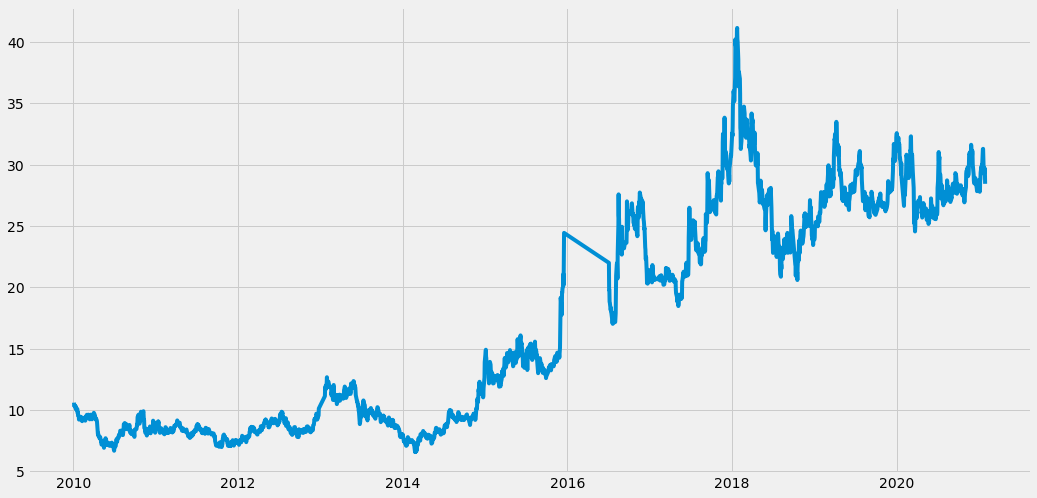

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price history')

In [15]:
df.drop(['ts_code', 'open', 'high', 'low', 'pre_close','pct_chg', 'vol', 'amount'], axis=1)

,close,change
trade_date,,
2010-01-04,10.60,-0.21
2010-01-05,10.36,-0.24
2010-01-06,10.36,0.00
2010-01-07,10.28,-0.08
2010-01-08,10.35,0.07
...,...,...
2021-01-22,29.26,-0.84
2021-01-25,29.36,0.10
2021-01-26,29.70,0.34


In [16]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
x_train, x_test = dataset[0:training_data_len], dataset[training_data_len:]
training_data_len

2031

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.1166088 ],
       [0.10966435],
       [0.10966435],
       ...,
       [0.66927083],
       [0.66059028],
       [0.63252315]])

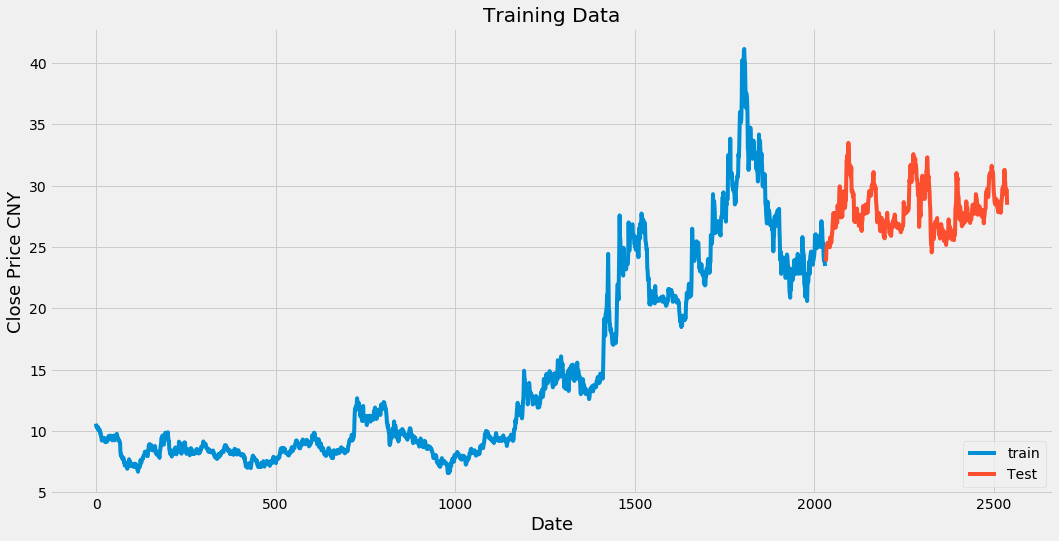

In [20]:
plt.figure(figsize=(16,8))
plt.title('Training Data')
plt.plot(x_train)
plt.plot([None for i in x_train] + [x for x in x_test])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price CNY', fontsize=18)
plt.legend(['train', 'Test'], loc='lower right')
plt.show()

In [21]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

# ????
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.1166088 , 0.10966435, 0.10966435, 0.10734954, 0.109375  ,
       0.10445602, 0.10763889, 0.10040509, 0.10011574, 0.10329861,
       0.10185185, 0.1009838 , 0.09230324, 0.09346065, 0.08622685,
       0.0853588 , 0.07667824, 0.0787037 , 0.08217593, 0.08015046,
       0.08217593, 0.07841435, 0.08333333, 0.08217593, 0.07609954,
       0.07378472, 0.07291667, 0.07638889, 0.07841435, 0.08101852,
       0.07783565, 0.07407407, 0.07696759, 0.08420139, 0.08275463,
       0.08304398, 0.08796296, 0.08709491, 0.08159722, 0.08072917,
       0.08159722, 0.08825231, 0.08420139, 0.08478009, 0.08072917,
       0.07725694, 0.078125  , 0.08304398, 0.0859375 , 0.08825231,
       0.0853588 , 0.08188657, 0.07725694, 0.07899306, 0.0859375 ,
       0.08449074, 0.08478009, 0.09143519, 0.09259259, 0.08767361])]
[0.0836226851851852]

[array([0.1166088 , 0.10966435, 0.10966435, 0.10734954, 0.109375  ,
       0.10445602, 0.10763889, 0.10040509, 0.10011574, 0.10329861,
       0.10185185, 0.1009838 , 0.092

In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1971, 60, 1)

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=1)

1971/1971 [==============================] - 44s 22ms/step - loss: 0.0015


In [25]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [26]:
x_test = np.array(x_test)

In [27]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [29]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.2932513567681848

C:\Users\JAYHAN02\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


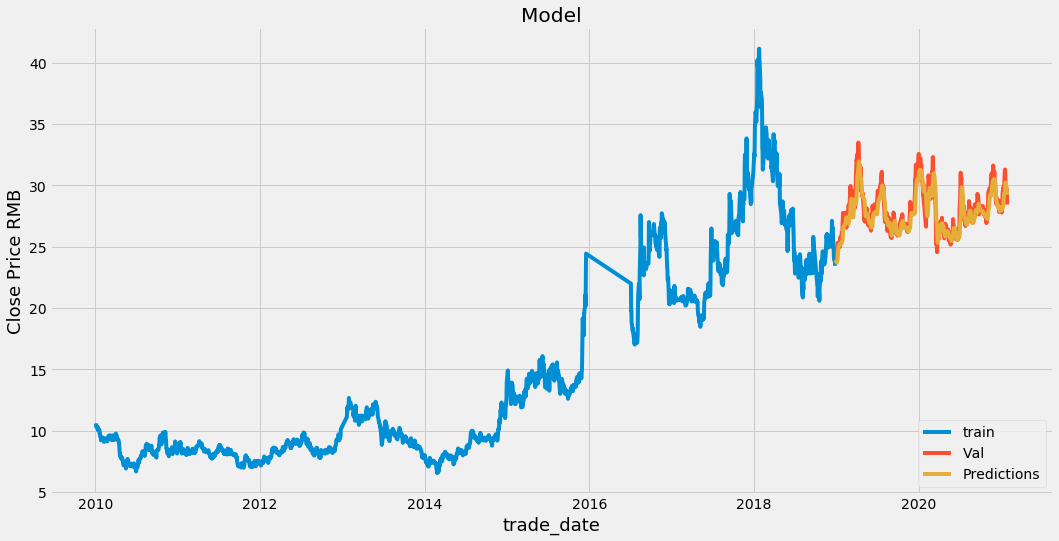

In [30]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('trade_date', fontsize=18)
plt.ylabel('Close Price RMB', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
valid[['close', 'Predictions']]

,close,Predictions
trade_date,,
2018-12-28,23.82,23.916994
2019-01-02,23.90,23.759684
2019-01-03,24.07,23.707918
2019-01-04,24.93,23.748075
2019-01-07,25.05,23.972385
...,...,...
2021-01-22,29.26,30.174961
2021-01-25,29.36,29.907261
2021-01-26,29.70,29.604845


In [59]:
# apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
apple_quote = pro.daily(ts_code='000002.SZ', start_date='20100128', end_date='20210128')
new_df = apple_quote.filter(['close'])
last_60_days = new_df[-1:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
# apple_quote.head()

[[19.46304]]


In [58]:
# apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
apple_quote2 = pro.daily(ts_code='000002.SZ', start_date='20210129', end_date='20210129')
# apple_quote2
print(apple_quote2['close'])

0    27.79
Name: close, dtype: float64
